In [40]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from typing import Tuple, Dict, List, Union
%matplotlib inline

#### 3) Implemente o método da Silhueta para definir o número de clusters de uma dada amostra.

##### Vou me basear no exercício 8.8 e montar clusters com 5 iterações para K entre 2 até 8.

In [42]:
def inicialize_centroids(K):
    random_centroids = []
    for _ in range(K):
        random_centroids.append([4 * np.random.random_sample(size=None) - 2, 5 * np.random.sample(size=None) - 5])
    return np.array(random_centroids)

In [43]:
def adjust_data(data, P):
    new_data = []
    for p in range(P):
        new_data.append(data[:, p])
    return np.array(new_data)

In [44]:
def assign_points(centroids: np.ndarray, X: np.ndarray) -> List[Union[np.ndarray, List[np.ndarray]]]:    
    
    assignments = [[c, []] for c in centroids]

    for x_p in X:
        smallest_distance = np.linalg.norm(x_p - centroids[0])
        centroid_assignment = centroids[0]

        for c in centroids:
            distance = np.linalg.norm(x_p - c)
            # print("Distância calculada:", distance)
            if distance < smallest_distance:
                smallest_distance = distance
                centroid_assignment = c
        
        # print("Ponto: {}\nCentróide designado: {}\nDistância: {}\n".format(x_p, centroid_assignment, smallest_distance))
        
        for a in assignments:
            if np.array_equal(a[0], centroid_assignment):
                a[1].append(x_p)
                break

    return assignments

In [83]:
def recalculate_clusters_centroids(clusters: List[Union[np.ndarray, List[np.ndarray]]]) -> np.ndarray: 

    def get_mean(points: List[np.ndarray]) -> np.ndarray:
        qnt = len(points)
        ss = np.zeros(points[0].shape[0])
        for x_p in points:
            ss += x_p
        return ss / qnt

    new_centroids = []

    for i, c in enumerate(clusters):
        centroid, cluster_points = c
        # if len(cluster_points) == 0:
        #     new_centroids.append(centroid)
        new_c = get_mean(cluster_points)
        new_centroids.append(new_c)

    return new_centroids

In [84]:
def calculate_silhouette_score(clusters: List[Union[np.ndarray, List[np.ndarray]]]) -> float:

    def calculate_mean_distance_between_point_cluster(point: np.ndarray, cluster: Union[np.ndarray, List[np.ndarray]]) -> float:
        mean_distance = 0
        cluster_points = cluster[1]
        for x_p_c in cluster_points:
            if np.array_equal(point, x_p_c):
                continue
            mean_distance += calculate_distenca_between_vectors(point, x_p_c) # always positive
        return mean_distance / len(cluster_points)
    
    def calculate_s_coef(a: float, b: float) -> float:
        s = (b - a) / max(a, b)
        assert s >= -1 and s <= 1, "Something went wrong while calculating S coeficient."
        return s

    def calculate_distenca_between_vectors(v1: np.ndarray, v2: np.ndarray) -> float:
        assert np.size(v1) == np.size(v2), "Vectors should have same length."
        return np.linalg.norm(v1 - v2)
    
    def calculate_cluster_distance(c1: Union[np.ndarray, List[np.ndarray]], c2: Union[np.ndarray, List[np.ndarray]]) -> float:
        return np.linalg.norm(c1[0] - c2[0])
    
    def find_nearest_cluster(main_cluster: Union[np.ndarray, List[np.ndarray]], clusters: List[Union[np.ndarray, List[np.ndarray]]]) -> List[Union[np.ndarray, List[np.ndarray]]]:
        nearest_cluster, nearest_distance = None, None
        for c in clusters:
            centroid, points = c
            # If centroids are equal, they are the same cluster
            if np.array_equal(main_cluster[0], centroid): 
                continue
            distance = calculate_cluster_distance(main_cluster, c)
            if not nearest_cluster or distance < nearest_distance:
                nearest_cluster = c
                nearest_distance = distance
        return nearest_cluster
            
    silhouette_score = 0
    total_points = 0

    for index, cluster in enumerate(clusters):
        # print("-- Calculando coeficiente S do Cluster {}".format(index + 1))
        centroid, points = cluster
        nearest_cluster = find_nearest_cluster(main_cluster=cluster, clusters=clusters)

        for x_p in points:
            b_coef = calculate_mean_distance_between_point_cluster(x_p, nearest_cluster)
            a_coef = calculate_mean_distance_between_point_cluster(x_p, cluster)
            s_coef = calculate_s_coef(a_coef, b_coef)
            silhouette_score += s_coef
            total_points += 1

    return silhouette_score / total_points





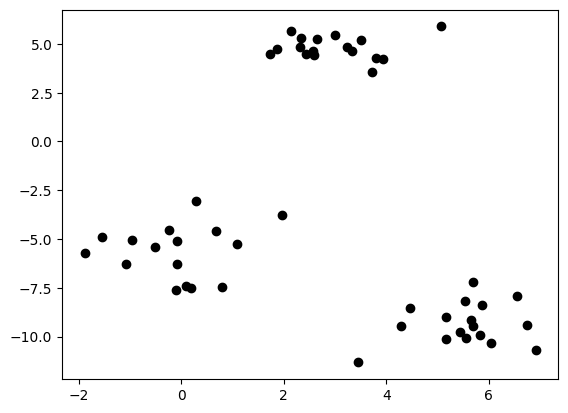

In [85]:
# Loading the data
P = 50 # Number of data points
blobs = datasets.make_blobs(n_samples=P, centers=3, random_state=10)
data = np.transpose(blobs[0])

# scatter plot the dataset 
plt.scatter(data[0,:],data[1,:],c = 'k')
plt.show();

In [86]:
K = 3
N = 2
I = 5

silhouette_result = {}

for k_s in range(3, 8+1):

    print("Cálculo para {} clusters.".format(k_s))

    adjusted_data = adjust_data(data, P)
    initial_centroids_guess = inicialize_centroids(K)
    centroids = initial_centroids_guess

    for i in range(I):
        centroids = initial_centroids_guess if i == 0 else recalculate_clusters_centroids(clusters=clusters);
        clusters = assign_points(centroids=centroids, X=adjusted_data);

    s_coef = calculate_silhouette_score(clusters)
    silhouette_result[k_s] = s_coef

print(silhouette_result)

        



Cálculo para 3 clusters.
Cálculo para 4 clusters.
Cálculo para 5 clusters.
Cálculo para 6 clusters.
Cálculo para 7 clusters.
Cálculo para 8 clusters.
{3: 0.7867682207672736, 4: 0.7867682207672742, 5: 0.7867682207672739, 6: 0.7867682207672739, 7: 0.7867682207672736, 8: 0.7867682207672739}
